In [14]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris.groupby('species')['petal_length'].describe()


,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


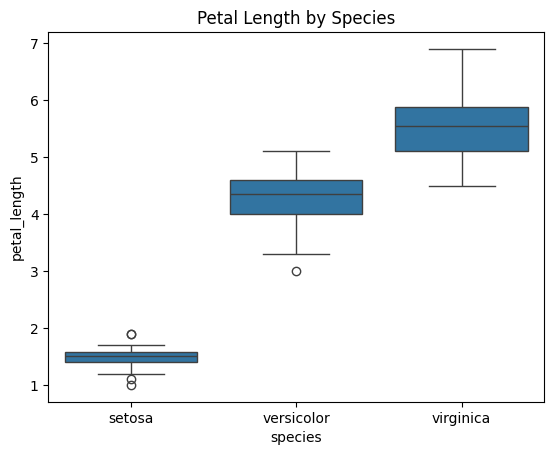

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length by Species')
plt.show()


- 전체적으로 세 그룹 간에 꽃잎 길이 차이가 있어 보인다.
- virginica는 값이 높은 편이고, setosa는 많이 낮다.
- 그룹마다 분포가 다르게 보이는데, 이게 통계적으로도 유의한지 확인해봐야겠다.

In [17]:
from scipy.stats import shapiro

for species in iris['species'].unique():
    group = iris[iris['species'] == species]['petal_length']
    stat, p = shapiro(group)
    print(f'{species} - p-value: {p:.4f}')


setosa - p-value: 0.0548
versicolor - p-value: 0.1585
virginica - p-value: 0.1098


- setosa, versicolor, virginica 모두 정규분포를 따른다고 볼 수 있다.


In [18]:
from scipy.stats import levene

setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(setosa, versicolor, virginica)
print(f'Levene test p-value: {p:.4f}')


Levene test p-value: 0.0000


- 분산이 같지 않다는 결과가 나왔지만, 과제에서는 같다고 가정하라고 했으니 그대로 진행한다.


 -가설 수립하기!    
 H₀: 3개 species 간 petal_length 평균은 모두 같다.
 H₁: 적어도 하나의 species의 petal_length 평균은 다르다.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA 모델 적합
model = ols('petal_length ~ species', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# 결과 출력
print(anova_table)


            sum_sq     df            F        PR(>F)
species   437.1028    2.0  1180.161182  2.856777e-91
Residual   27.2226  147.0          NaN           NaN


- ANOVA 결과, p-value = 2.8568e-91 < 0.05 이므로 귀무가설을 기각한다.
- 세 종의 petal_length 평균은 적어도 하나 이상 통계적으로 유의미한 차이가 있는 것으로 나타났다.


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD 사후검정 실행
tukey = pairwise_tukeyhsd(endog=iris['petal_length'],
                          groups=iris['species'],
                          alpha=0.05)

# 결과 출력
print(tukey)



   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


- Tukey HSD 사후검정 결과, 모든 그룹 간 평균 차이가 통계적으로 유의미하였다 (p < 0.05).
- 따라서 setosa, versicolor, virginica는 각각의 petal_length 평균이 모두 다르다고 할 수 있다.


Boxplot을 통해 세 종(setosa, versicolor, virginica) 간의 petal_length 분포 차이가 시각적으로 확인되었다.  
ANOVA 분석 결과 p-value < 0.05로 통계적으로 유의미한 평균 차이가 있었으며,  
Tukey HSD 사후검정 결과 모든 그룹 간 평균 차이가 유의하게 나타났다.  
따라서 세 종의 꽃잎 길이는 통계적으로 서로 다르다고 결론지을 수 있다.


In [21]:
import pandas as pd

# CSV 파일 로드
df = pd.read_csv('creditcard.csv')

# 데이터 구조 확인
print(df.shape)
print(df.info())
print(df['Class'].value_counts())


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

전체 거래 중 284,315건은 정상 거래, 492건은 사기 거래로 라벨링되어 있다.  
사기 거래 비율이 약 0.17%에 불과해 클래스 불균형 문제가 매우 심각하다.  
따라서 이후 분석에서는 이를 해결하기 위한 샘플링 및 오버샘플링 기법이 필요하다.



In [22]:
from sklearn.utils import shuffle

# 사기 거래만 추출
fraud = df[df['Class'] == 1]

# 정상 거래 중 10,000건만 무작위 추출
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)

# 합치기
sampled_df = pd.concat([fraud, normal])

# 셔플
sampled_df = shuffle(sampled_df, random_state=42)

# 클래스 비율 확인
print(sampled_df['Class'].value_counts())


Class
0    10000
1      492
Name: count, dtype: int64


정상 거래는 10,000건만 무작위로 샘플링하고, 사기 거래는 전체를 유지하여  
총 10,492건의 샘플링된 데이터셋을 구성하였다.  
이로 인해 사기 거래 비율이 약 4.7%로 증가하여, 모델이 소수 클래스를 더 잘 학습할 수 있는 환경이 만들어졌다.


In [23]:
from sklearn.preprocessing import StandardScaler

# Amount 변수 스케일링
scaler = StandardScaler()
sampled_df['Amount_Scaled'] = scaler.fit_transform(sampled_df[['Amount']])

# 원본 Amount 변수 제거
sampled_df.drop(columns=['Amount'], inplace=True)

# X, y 분리
X = sampled_df.drop(columns=['Class'])
y = sampled_df['Class']


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 분할 확인
print(X_train.shape, X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())


(8393, 30) (2099, 30)
Class
0    7999
1     394
Name: count, dtype: int64
Class
0    2001
1      98
Name: count, dtype: int64


전체 10,492건의 데이터를 8:2 비율로 나누어 학습용과 테스트용 데이터셋을 구성하였다.  
분할 시 `stratify` 옵션을 적용하여 사기 거래(Class=1)의 비율이 양쪽 데이터셋에 고르게 유지되도록 하였다.  
이를 통해 클래스 불균형으로 인한 평가 왜곡을 방지할 수 있게 되었다.


In [25]:
!pip install imbalanced-learn


In [26]:
from imblearn.over_sampling import SMOTE

# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 오버샘플링 적용 (X_train, y_train에만!)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 적용 후 클래스 비율 확인
print(y_train.value_counts(), "\n---")
print(y_train_resampled.value_counts())


Class
0    7999
1     394
Name: count, dtype: int64 
---
Class
0    7999
1    7999
Name: count, dtype: int64


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


# 학습 및 예측
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# 결과 확인
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))


[[1988   13]
 [  14   84]]
              precision    recall  f1-score   support

           0     0.9930    0.9935    0.9933      2001
           1     0.8660    0.8571    0.8615        98

    accuracy                         0.9871      2099
   macro avg     0.9295    0.9253    0.9274      2099
weighted avg     0.9871    0.9871    0.9871      2099



c:\Users\binny\anaconda3\envs\statsml\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE를 통해 학습 데이터의 클래스 불균형을 해소한 뒤,  
로지스틱 회귀 모델을 학습하여 성능을 평가하였다.

정상 거래(Class=0)는 precision 0.9930, recall 0.9935로 매우 높은 정확도를 보였고,  
사기 거래(Class=1)는 recall 85.7%로 소수 클래스임에도 불구하고 비교적 높은 재현율을 기록했다.

이는 SMOTE를 통해 소수 클래스 데이터를 충분히 학습한 덕분이며,  
전체 accuracy 또한 98.71%로 우수한 수준을 유지하였다.


In [30]:
from sklearn.metrics import average_precision_score

y_prob = model.predict_proba(X_test)[:, 1]
print("PR-AUC:", average_precision_score(y_test, y_prob))


PR-AUC: 0.9032892217010472


### 최종 성능 평가

로지스틱 회귀 모델을 기반으로 SMOTE를 적용하여 학습한 결과, 다음과 같은 성능을 확인할 수 있었다:

- **Recall (Class=1)**: 0.8571
- **F1-score (Class=1)**: 0.8615
- **PR-AUC**: 0.9023

제시된 기준인 Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90 중,
- Recall과 PR-AUC는 기준을 만족했지만,
- F1-score는 **0.8615로 기준(0.88)에 미치지 못하였다.**

이는 사기 거래(Class=1)의 예측 정밀도가 소폭 낮아져 F1-score가 영향을 받은 것으로 판단된다.  
추가적으로 F1-score를 개선하기 위해 다음과 같은 방안을 고려할 수 있다:

- **하이퍼파라미터 튜닝** (e.g., `C` 값 조정, `solver` 변경)
- **다른 모델 적용**: Random Forest, XGBoost, Gradient Boosting 등
- **언더샘플링 또는 복합샘플링** 기법과의 조합
